# Statistics basics
***

https://www.youtube.com/watch?v=biuz0yS8Z5Y

## Introduction
In this tutorial you are going to learn how to use Python tools to visualize and analyze randomly generated data. The purpose is to get acquainted with statistical concepts such as __probability density functions__ and __cumulative distribution functions__.

As usual, we start by importing Python packages that we will use later on. In this tutorial, we are using _NumPy_ to create random numbers, the set of statistical tools in _SciPy_, and _Matplotlib_ and _Seaborn_ to plot graphs.

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
sns.set_context('notebook')

## Example: normal distribution
As an example, we create an array of random numbers extracted from a normal distribution of mean (`loc`) 0 and standard deviation (`scale`) 1.

In [32]:
# create an array of random numbers taken from a normal distribution
np.random.seed(0)
x_rand = np.random.normal(loc=0, scale=1.0, size=1000) # loc = mean, scale = stddev
x_rand

array([ 1.76405235e+00,  4.00157208e-01,  9.78737984e-01,  2.24089320e+00,
        1.86755799e+00, -9.77277880e-01,  9.50088418e-01, -1.51357208e-01,
       -1.03218852e-01,  4.10598502e-01,  1.44043571e-01,  1.45427351e+00,
        7.61037725e-01,  1.21675016e-01,  4.43863233e-01,  3.33674327e-01,
        1.49407907e+00, -2.05158264e-01,  3.13067702e-01, -8.54095739e-01,
       -2.55298982e+00,  6.53618595e-01,  8.64436199e-01, -7.42165020e-01,
        2.26975462e+00, -1.45436567e+00,  4.57585173e-02, -1.87183850e-01,
        1.53277921e+00,  1.46935877e+00,  1.54947426e-01,  3.78162520e-01,
       -8.87785748e-01, -1.98079647e+00, -3.47912149e-01,  1.56348969e-01,
        1.23029068e+00,  1.20237985e+00, -3.87326817e-01, -3.02302751e-01,
       -1.04855297e+00, -1.42001794e+00, -1.70627019e+00,  1.95077540e+00,
       -5.09652182e-01, -4.38074302e-01, -1.25279536e+00,  7.77490356e-01,
       -1.61389785e+00, -2.12740280e-01, -8.95466561e-01,  3.86902498e-01,
       -5.10805138e-01, -

### Visualization
Let's plot the histogram of the random data with the _Seaborn_ function `distplot`.

(array([  3.,   6.,   9.,  11.,  30.,  40.,  59.,  87., 103., 114., 116.,
        123.,  83.,  77.,  48.,  38.,  22.,  16.,  11.,   4.]),
 array([-3.04614305, -2.75586815, -2.46559324, -2.17531833, -1.88504342,
        -1.59476851, -1.3044936 , -1.0142187 , -0.72394379, -0.43366888,
        -0.14339397,  0.14688094,  0.43715585,  0.72743075,  1.01770566,
         1.30798057,  1.59825548,  1.88853039,  2.1788053 ,  2.46908021,
         2.75935511]),
 <BarContainer object of 20 artists>)

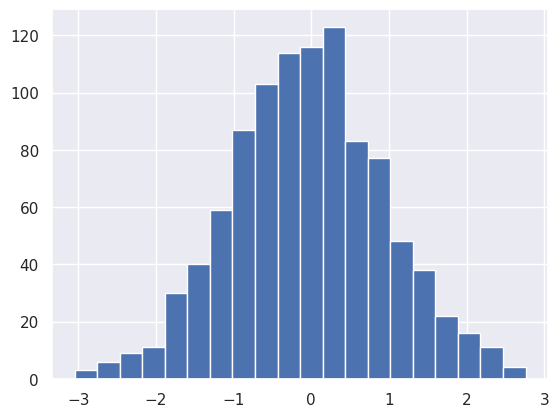

In [11]:
# not very nice?
plt.hist(x_rand, bins=20)

<AxesSubplot: ylabel='Count'>

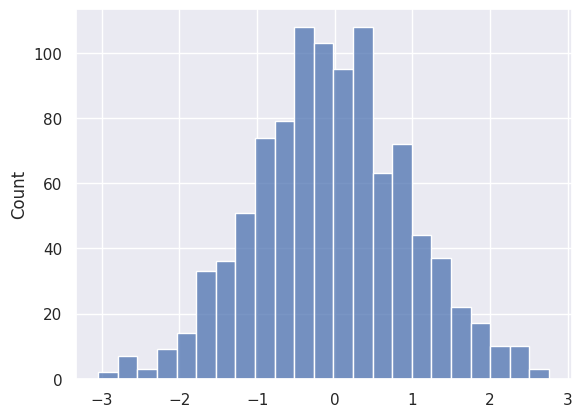

In [15]:
# histogram
sns.histplot(x_rand, kde=False)

The histogram visualization is sensitive to the number of bins in which the variable range is divided. `histplot` calculates by default the number of bins that it estimates best, but you can set a fixed number of bins and check how the histogram changes.

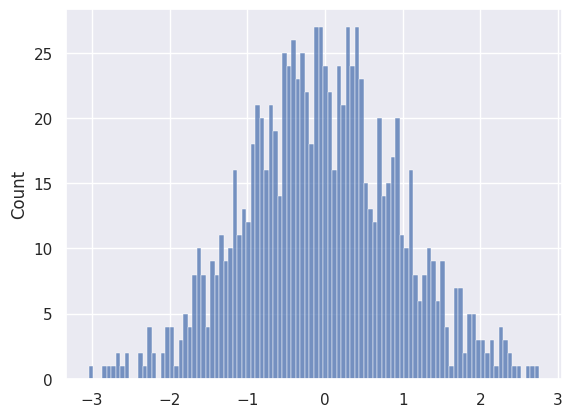

In [13]:
# histogram with different number of bins
sns.histplot(x_rand, bins=100, kde=False);

To avoid this limitation, `histplot` uses a function called kernel density estimation (KDE) to create a softened line that represents the shape of the data distribution independent of the number of bins.

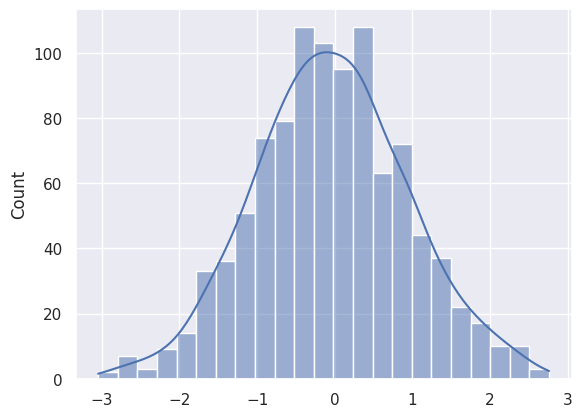

In [18]:
# histogram + kernel density estimate (default)
sns.histplot(x_rand, kde=True);

The kernel density estimate resembles what we expect our distribution to look like, a Gaussian bell. Actually, if we know the distribution of our data, we can fit and plot the distribution with `distplot`.

/tmp/ipykernel_599434/3630627283.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_rand, fit=stats.norm, kde=False);


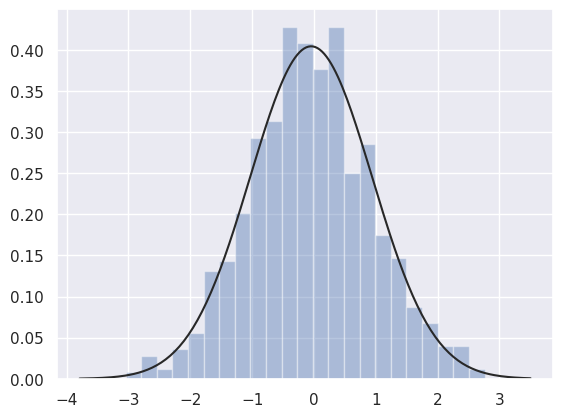

In [22]:
# histogram + fitted normal distribution
sns.distplot(x_rand, fit=stats.norm, kde=False);

### Distribution fitting
Now were are going to use the statistical tools in _SciPy_ (`stats`) to fit a distribution to our data and to learn what are the __probability density function__ and the __cumulative distribution function__.

To fit a distribution function in `Scipy.stats` we only need to call the function `fit` to the specific distribution.

In [24]:
# fit a normal distribution
loc, scale = stats.norm.fit(x_rand) # mean, stddev
print(f'loc = {loc}\tscale = {scale}')

loc = -0.045256707490195384	scale = 0.9870331586690257


We check that the fit is not perfect, since we generated the random values from a normal distribution $N(0,1)$, i.e., $loc=0$ and $scale=1$. This is due to a limited amount of data, but the fit is good enough.

### Probability density function (PDF)
The probability density function represents the _relative likelihood_ that the variable takes a specific value. In practical terms, values with a higher PDF are more likely to happen. In the case of the normal distribution, the probability density function is the well-known Gaussian bell. Let's plot it for the distribution we have fitted above.

In `scipy.stats`, we will use the function `pdf`.

In [25]:
# linearly spaced values of X
x = np.linspace(start=-5, stop=5, num=100)

In [29]:
# PDF (probability density function)
pdf = stats.norm.pdf(x, loc=loc, scale=scale)
pdf

array([1.36377079e-06, 2.26762342e-06, 3.73123130e-06, 6.07554296e-06,
       9.78970727e-06, 1.56101114e-05, 2.46316771e-05, 3.84621583e-05,
       5.94326377e-05, 9.08799428e-05, 1.37519021e-04, 2.05925051e-04,
       3.05145719e-04, 4.47462933e-04, 6.49319634e-04, 9.32420238e-04,
       1.32500200e-03, 1.86325829e-03, 2.59287318e-03, 3.57059979e-03,
       4.86578328e-03, 6.56169491e-03, 8.75650888e-03, 1.15637218e-02,
       1.51117920e-02, 1.95427638e-02, 2.50096541e-02, 3.16724073e-02,
       3.96922893e-02, 4.92246808e-02, 6.04103505e-02, 7.33654335e-02,
       8.81705006e-02, 1.04859265e-01, 1.23407627e-01, 1.43723862e-01,
       1.65640846e-01, 1.88911192e-01, 2.13206099e-01, 2.38118559e-01,
       2.63171316e-01, 2.87829660e-01, 3.11518773e-01, 3.33644975e-01,
       3.53619853e-01, 3.70885945e-01, 3.84942443e-01, 3.95369267e-01,
       4.01847900e-01, 4.04177547e-01, 4.02285474e-01, 3.96230775e-01,
       3.86201310e-01, 3.72504023e-01, 3.55549342e-01, 3.35830763e-01,
      

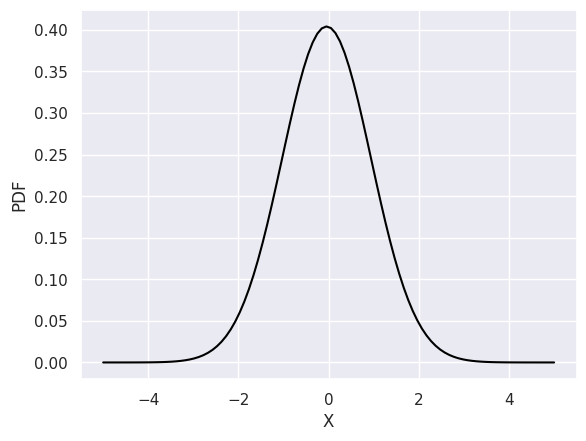

In [33]:
# line plot of the PDF
plt.plot(x, pdf, color='black')
plt.xlabel('X')
plt.ylabel('PDF');

### Cumulative distribution function (CDF)
The cumulative distribution function is the probability that the variable $X$ takes values lower or equal than $x$; for that reason it is also called the non-exceedance probability. The cumulative distribution function (CDF) is the integral of the probability density function (PDF).
$$CDF = P(x\leq X) = \int PDF$$

The CDF is a monotonic (i.e. only goes in one direction) increasing function that ranges between 0 and 1.

In `scipy.stats`, we will use the function `cdf`.

In [28]:
# CDF (cumulative distribution function)
cdf = stats.norm.cdf(x, loc=loc, scale=scale)

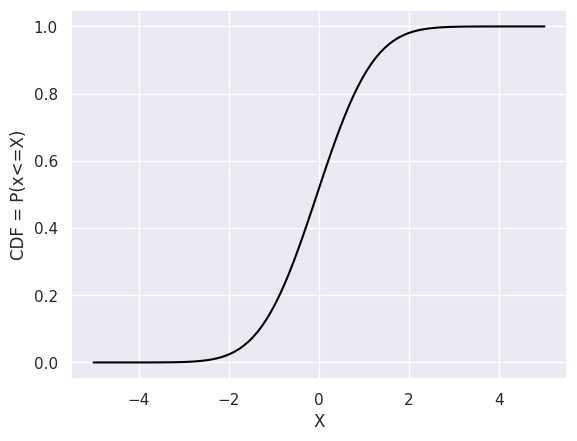

In [34]:
# line plot of the CDF
plt.plot(x, cdf, color='black')
plt.xlabel('X')
plt.ylabel('CDF = P(x<=X)');

### Percent point function (PPF)
`Scipy.stats` includes the function `ppf` (percent point function) that inverts the CDF, that is, it calculates the value of $X$ for a given value of the CDF.

In [39]:
# linearly spaced values CDF
cdf_ = np.linspace(start=0, stop=1, num=10000)

In [40]:
# x using 'ppf'
x_ = stats.norm.ppf(cdf_, loc=loc, scale=scale)

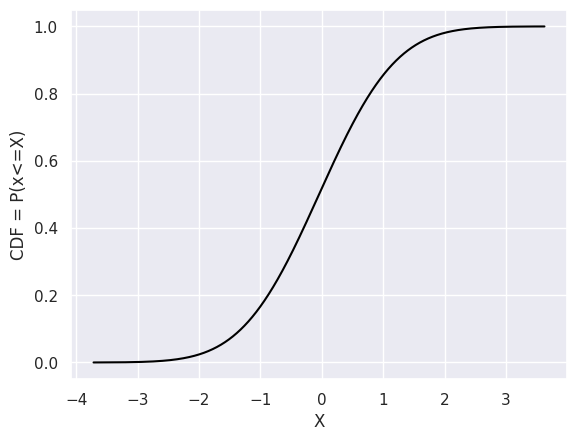

In [41]:
# line plot of the CDF
plt.plot(x_, cdf_, color='black')
plt.xlabel('X')
plt.ylabel('CDF = P(x<=X)');

### Use of the CDF
The fact that the CDF is a monotonic increasing function allows us to connect the values of the variable $X$ with its probability and viceversa. For instance:
1. What is the probability that the variable $X$ takes a value lower than $x=1$? → __CDF__
2. What is the value $x$ that is not exceeded 99% of the time? → __PPF__

In [42]:
# probability that the variable 𝑋 takes a value lower than 𝑥=1
cdf_1 = stats.norm.cdf(1, loc=loc, scale=scale)
cdf_1

0.8551974783788131

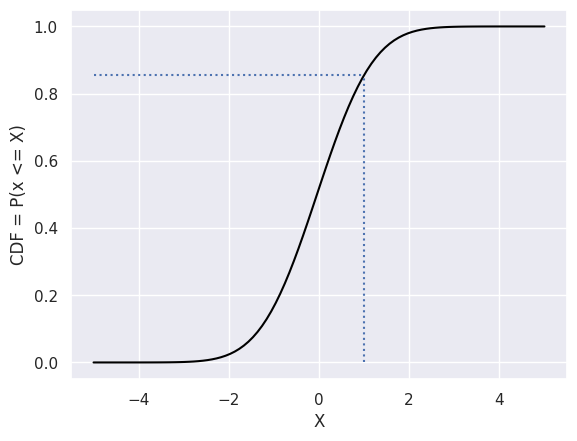

In [43]:
plt.plot(x, cdf, color='black')
plt.vlines(1, 0, cdf_1, linestyle=':')
plt.hlines(cdf_1, -5, 1, linestyle=':')
plt.xlabel('X')
plt.ylabel('CDF = P(x <= X)');

In [44]:
# value 𝑥 that is not exceeded 99% of the time
x_99 = stats.norm.ppf(0.99, loc=loc, scale=scale)
x_99

2.2509257827873084

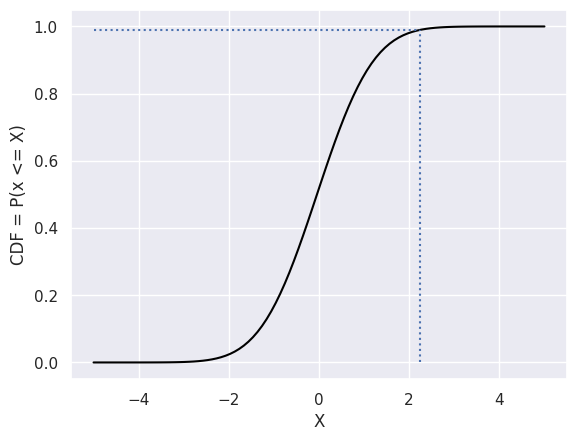

In [45]:
plt.plot(x, cdf, color='black')
plt.hlines(.99, -5, x_99, linestyle=':')
plt.vlines(x_99, 0, .99, linestyle=':')
plt.xlabel('X')
plt.ylabel('CDF = P(x <= X)');

### Useful link:
[Seaborn: visualizing the distribution of a dataset](https://seaborn.pydata.org/tutorial/distributions.html)